# **Finding Price of a house based on its features**


The Goal
* Each row in the dataset describes the characteristics of a house.
* Our goal is to predict the SalePrice, given these features.
* Our models are evaluated on the Root-Mean-Squared-Error (RMSE) between the log of the SalePrice predicted by our model, and the log of the actual SalePrice. Converting RMSE errors to a log scale ensures that errors in predicting expensive houses and cheap houses will affect our score equally.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
pd.pandas.set_option('display.max_columns',None)

In [ ]:
## Loading the dataset
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df = pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,test,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,test,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.shape

(2919, 82)

In [ ]:
nan_cols = [i for i in df.columns if df[i].isnull().sum()>=1]
print(nan_cols)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


In [ ]:
pd.set_option('display.max_rows', None)
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(['percent_missing'], ascending=False)

,column_name,percent_missing
PoolQC,PoolQC,99.657417
MiscFeature,MiscFeature,96.402878
Alley,Alley,93.216855
Fence,Fence,80.438506
SalePrice,SalePrice,49.982871
FireplaceQu,FireplaceQu,48.646797
LotFrontage,LotFrontage,16.649538
GarageCond,GarageCond,5.447071
GarageQual,GarageQual,5.447071
GarageFinish,GarageFinish,5.447071


In [ ]:
df = df.loc[:, df.isnull().mean() < .9]
df.shape

(2919, 79)

In [ ]:
df_train_categorical = df.select_dtypes(include=['object']).columns.tolist() 
print(len(df_train_categorical))

41


In [ ]:
df_train_numeric = df.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
df_year_feature = [year_feature for year_feature in df_train_numeric if 'Yr' in year_feature or 'Year' in year_feature ]
print(df_year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


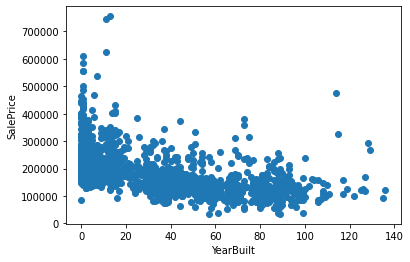

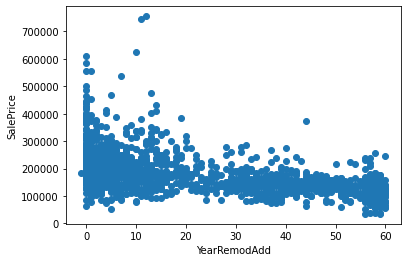

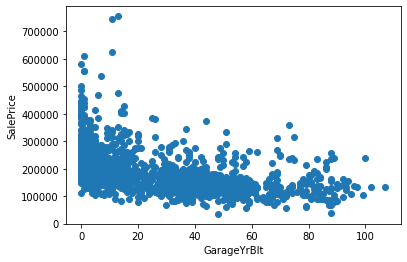

In [ ]:
for feature in df_year_feature:
    if feature!= 'YrSold':
        data = df.copy()
        data[feature] = data['YrSold']-data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
discrete_df = [feature for feature in df_train_numeric if len(df[feature].unique())<25 and feature not in df_year_feature+["ID"] ]

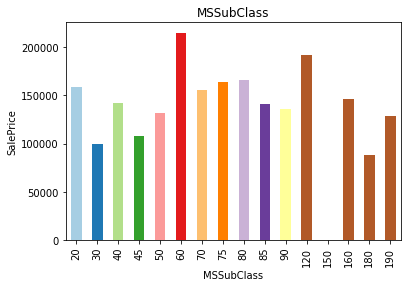

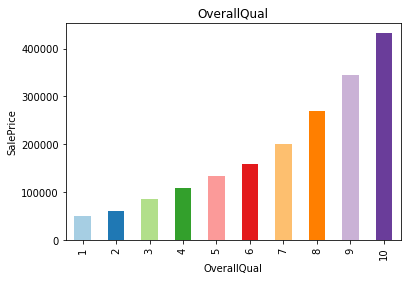

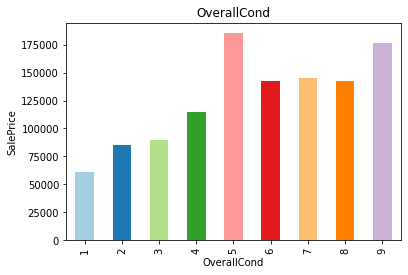

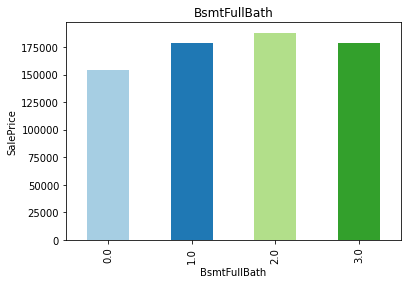

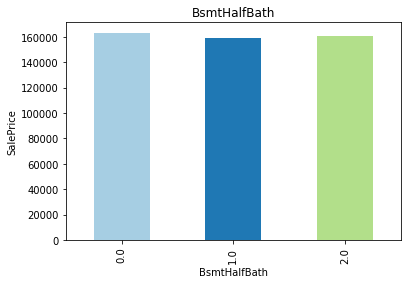

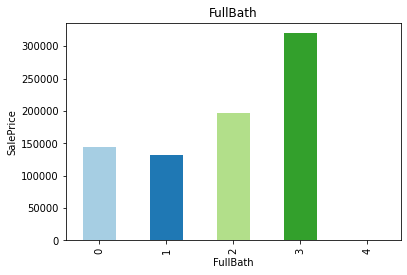

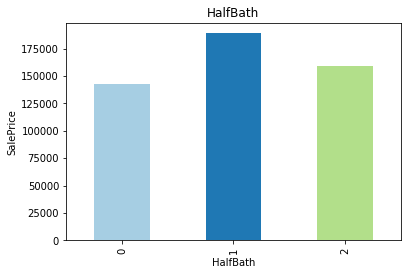

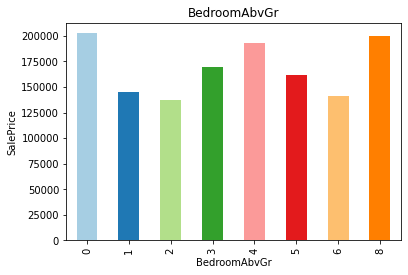

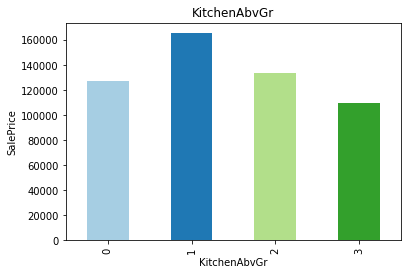

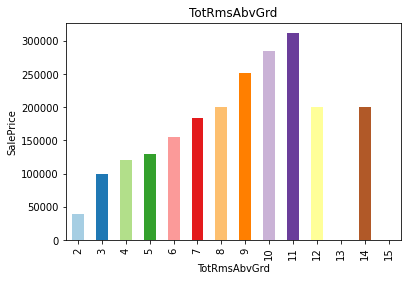

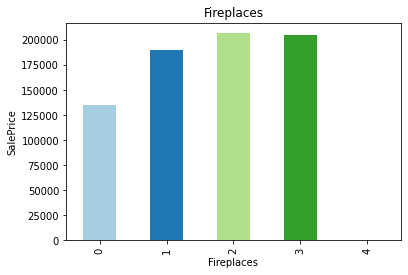

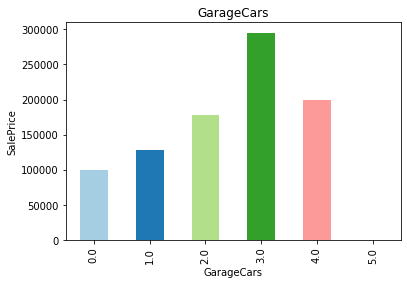

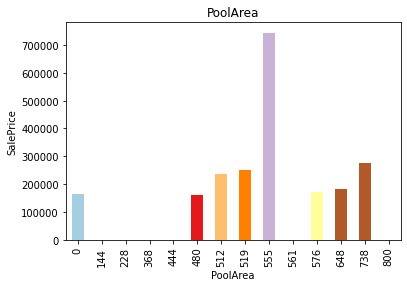

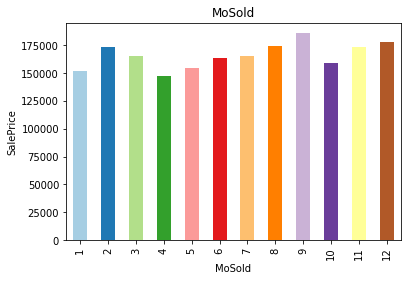

In [ ]:
for feature in discrete_df:
    N=25
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=plt.cm.Paired(np.arange(N)))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [ ]:
continous_df = [feature for feature in df_train_numeric if feature not in discrete_df+['Id']+df_year_feature+['SalePrice']]

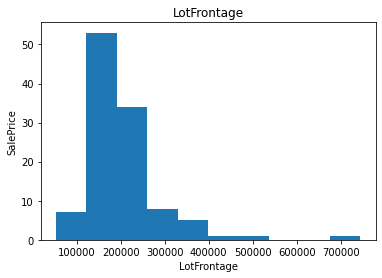

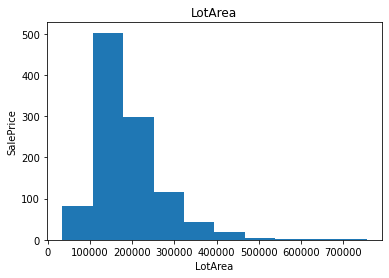

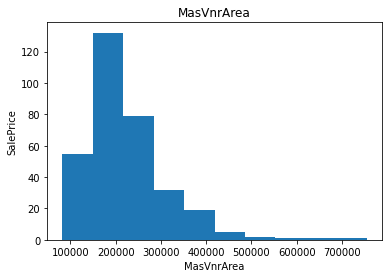

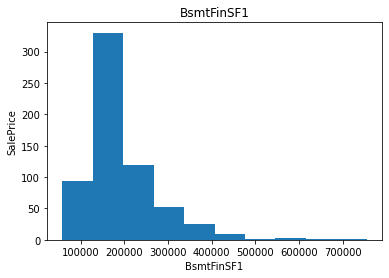

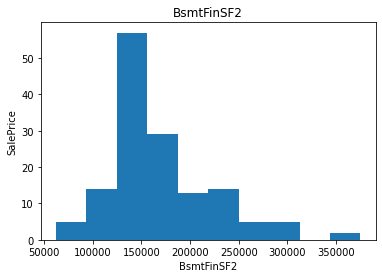

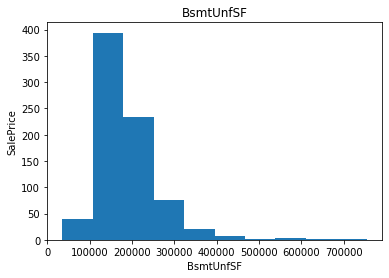

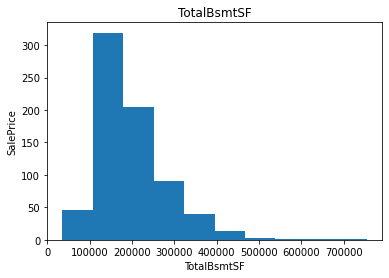

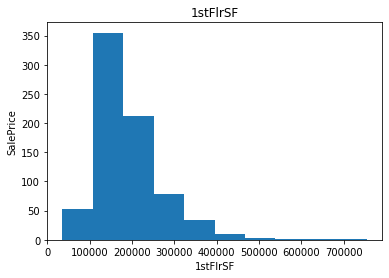

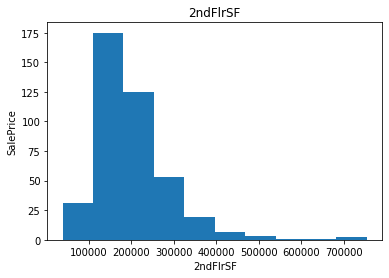

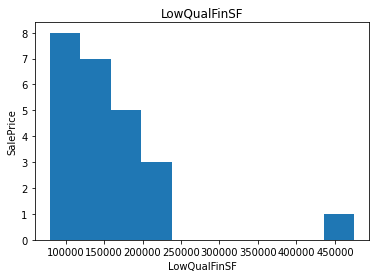

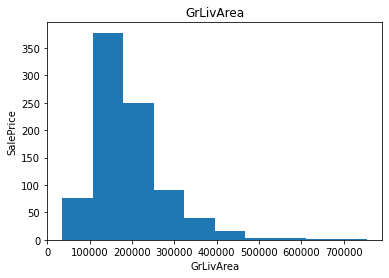

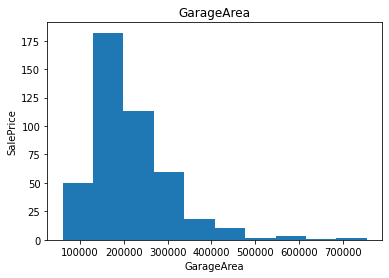

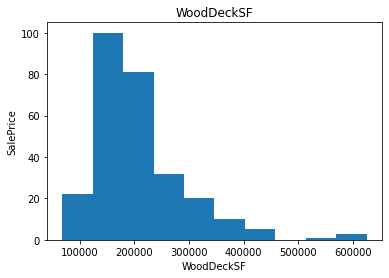

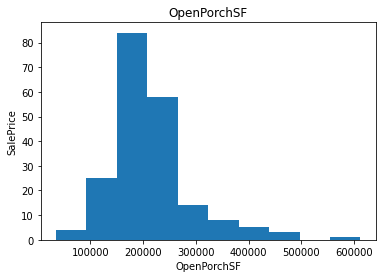

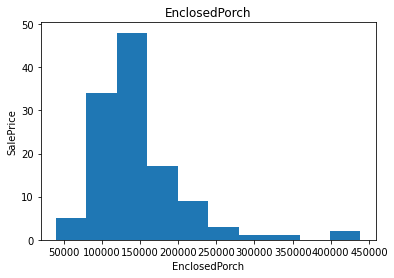

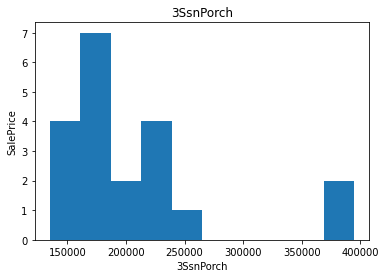

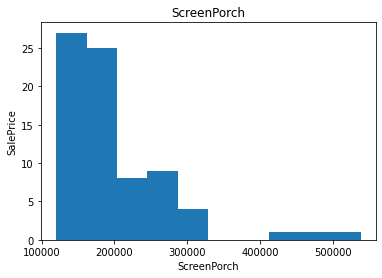

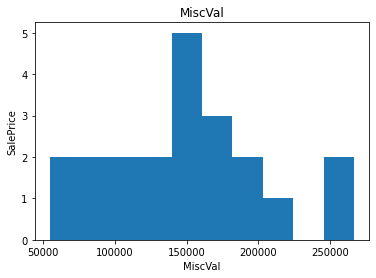

In [ ]:
for feature in continous_df:
    data = df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.hist()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

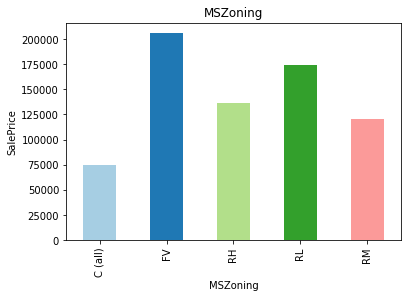

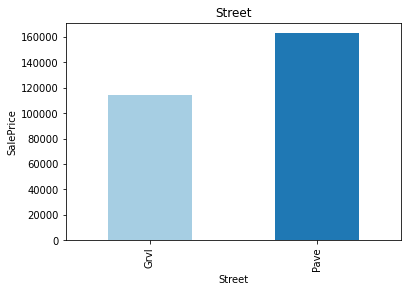

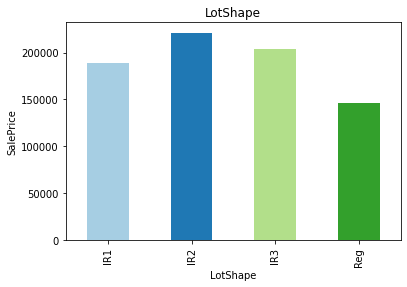

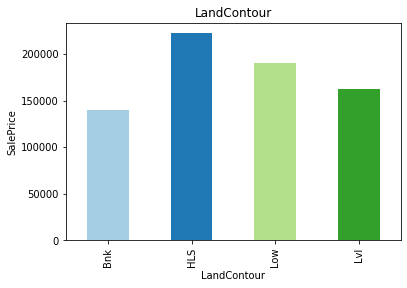

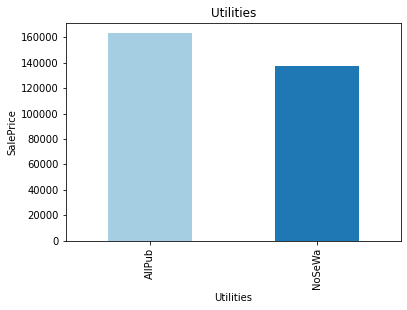

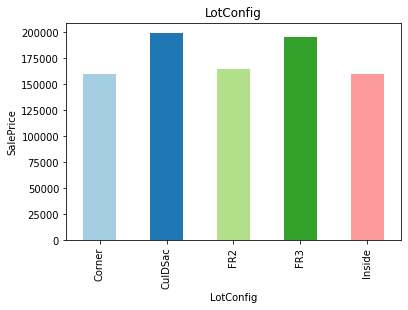

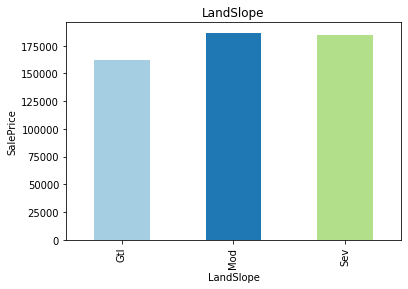

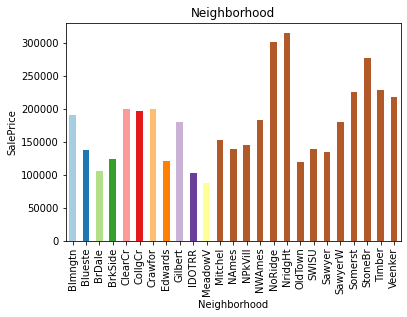

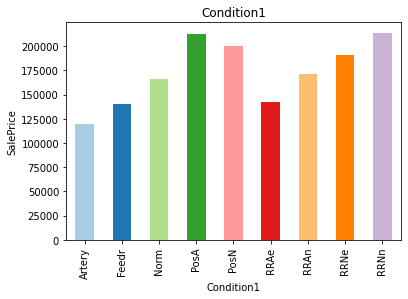

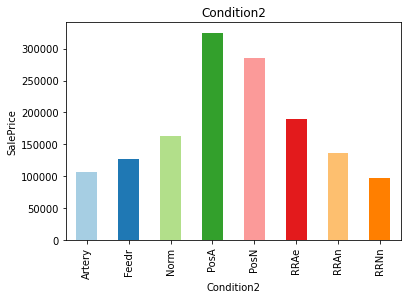

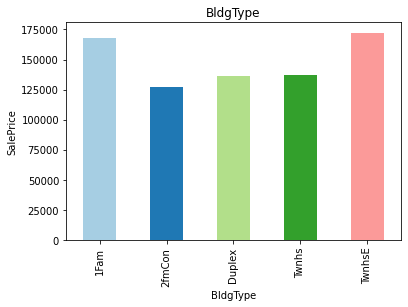

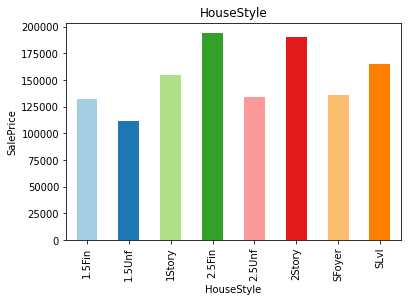

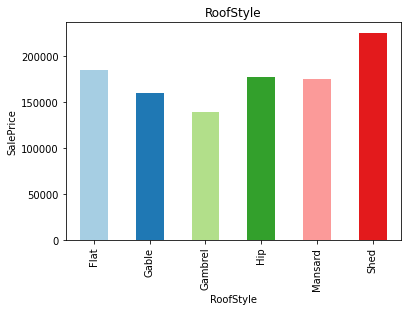

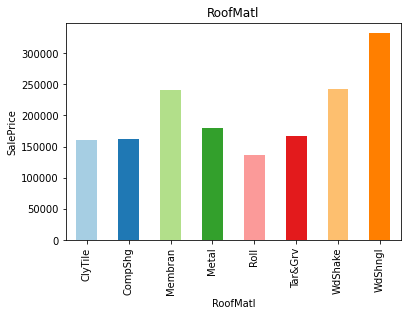

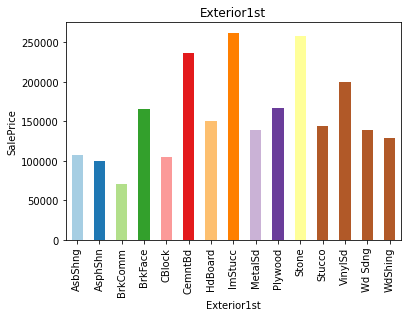

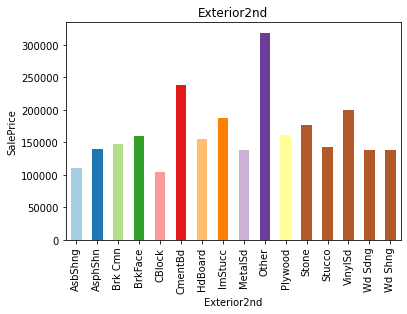

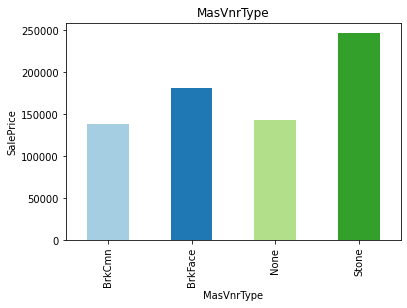

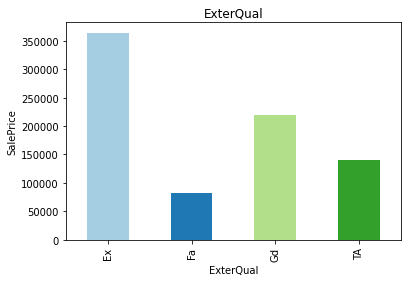

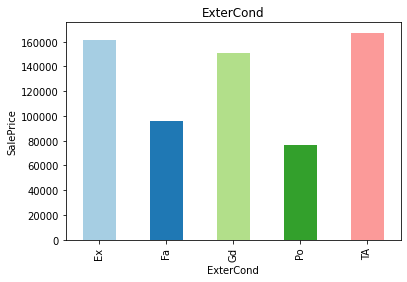

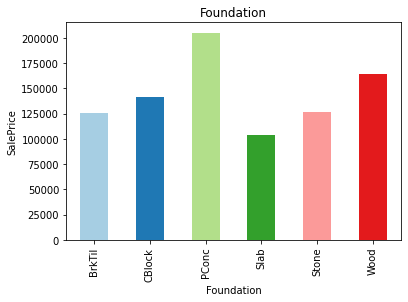

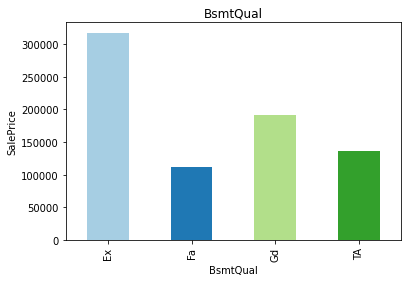

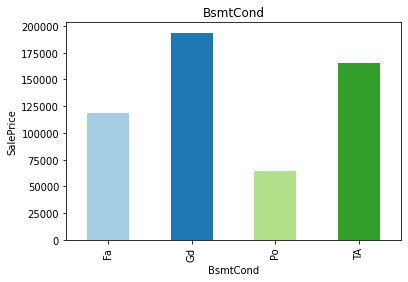

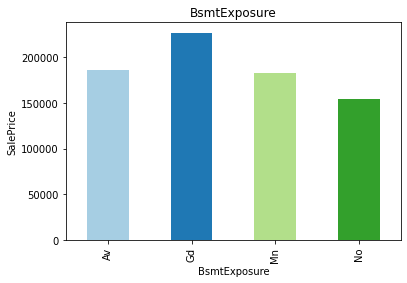

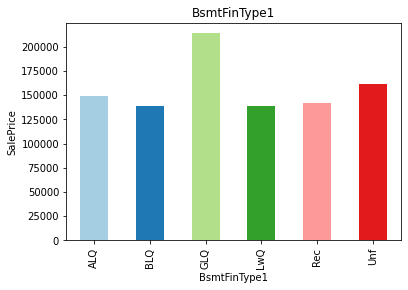

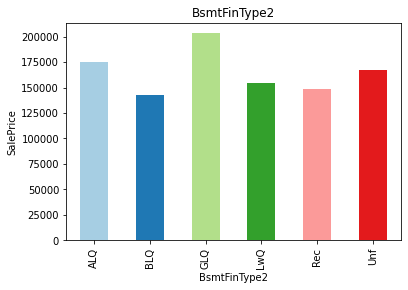

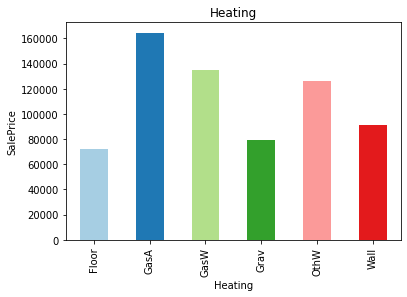

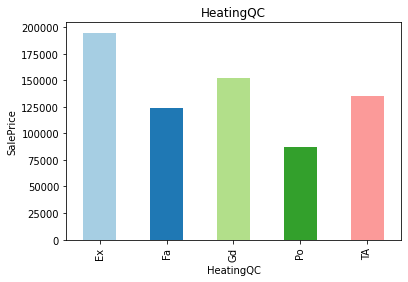

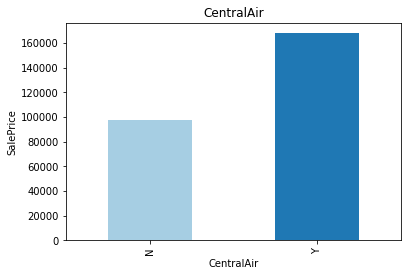

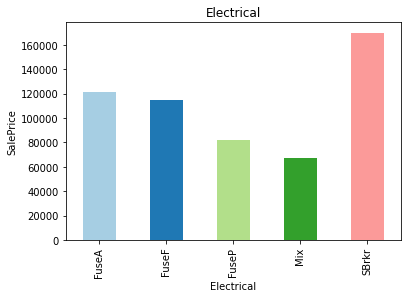

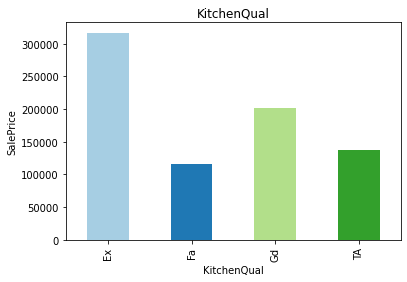

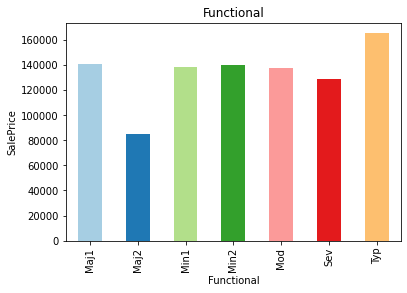

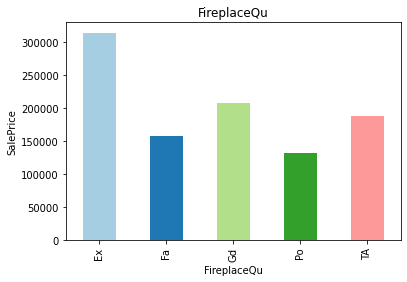

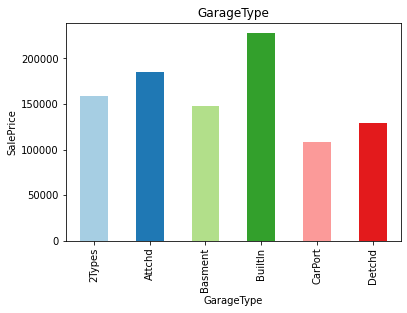

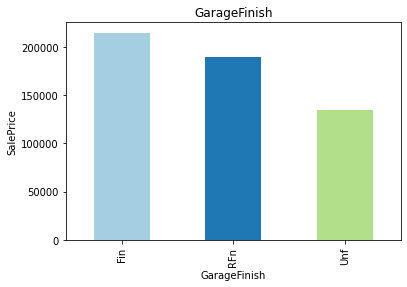

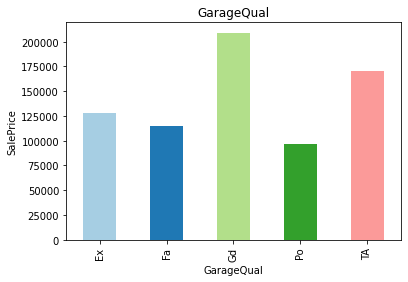

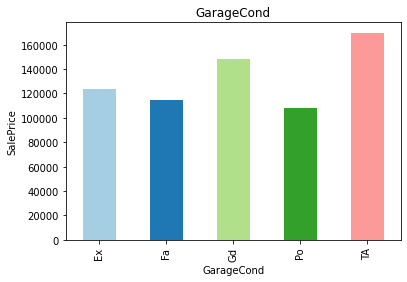

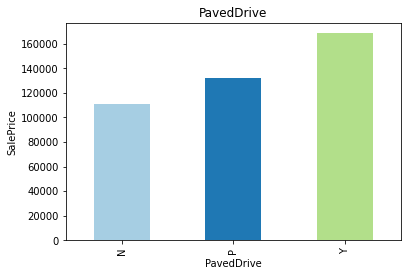

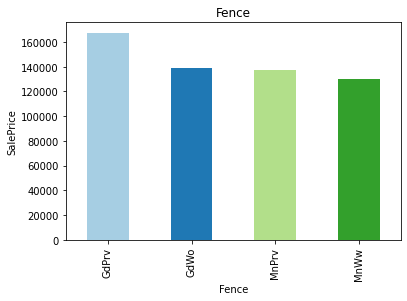

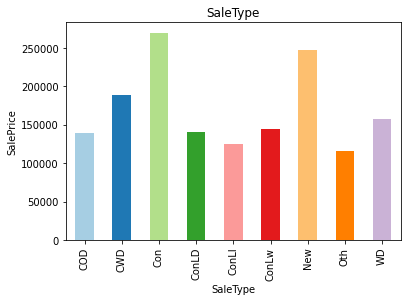

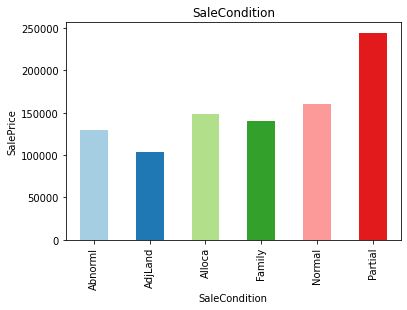

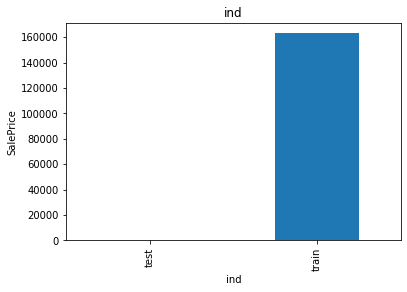

In [ ]:
for feature in df_train_categorical:
    N=25
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=plt.cm.Paired(np.arange(N)))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering
#### in this section we will perform below task
#### 1. Handle Missing values
#### 2. Handle Categorical Variable
#### 3. Handle Imbalance or skewd data
#### 4. Handle Outliers


In [ ]:
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']
numerical_with_nan.remove('SalePrice')
numerical_with_nan

['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']

In [ ]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

## 2. Handling Tamporal Variable

In [ ]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[feature]=df['YrSold']-df[feature]

In [ ]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


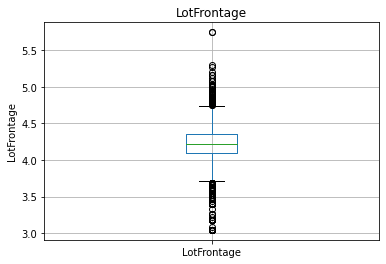

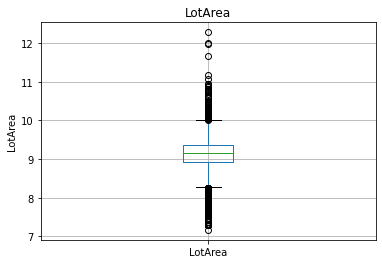

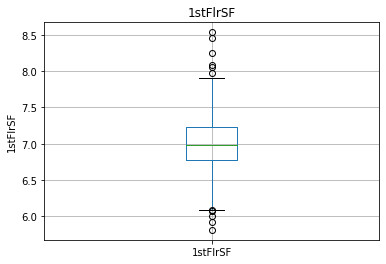

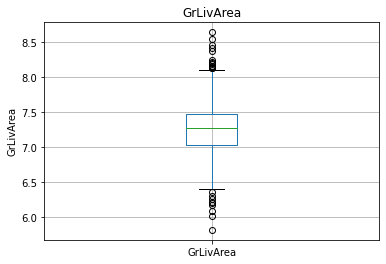

In [ ]:
for feature in continous_df:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [ ]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    df[feature]=np.log(df[feature])

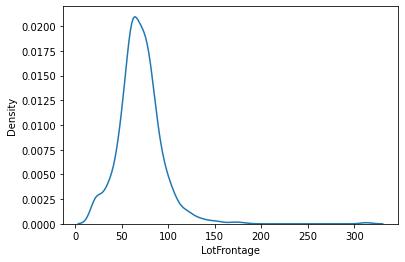

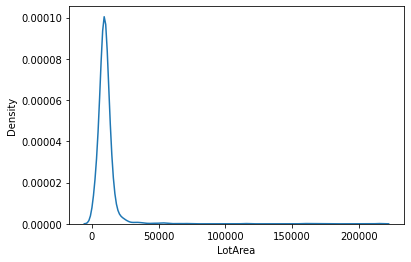

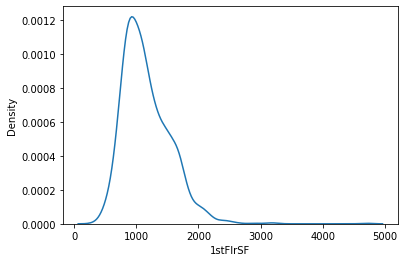

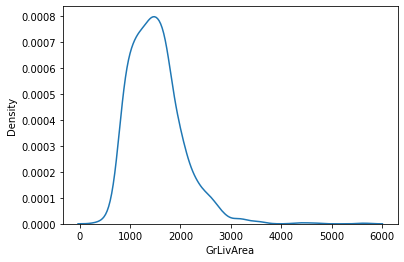

In [ ]:
for feature in num_features:
    sns.kdeplot(data=df_train, x=feature,  legend=True)
    plt.show()

In [ ]:
num_feature=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

def iqr_feature(features, df):
    dict = {}
    max_lmt = []
    min_lmt=[]
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q2 = df[feature].quantile(0.75)
        IQR = q2 - q1
#         iqr.append(IQR)
        max_limit = q2 + (1.5 * IQR)
        max_lmt.append(max_limit)
        min_limit = q1 - (1.5 * IQR) 
        min_lmt.append(min_limit)
#         dict.update({feature: [min_limit,max_limit]})
#     return dict
    return max_lmt, min_lmt
    
max_lmt, min_lmt= iqr_feature(num_feature, df)
min_lmt

[3.7007981655208635,
 8.265045593678952,
 6.0855270563047945,
 6.3705922842573806,
 3937.5]

In [ ]:
s1 = pd.Series(max_lmt)
s2 = pd.Series(min_lmt)


df_min_max = pd.DataFrame(list(zip(num_feature,s1, s2)), columns=['num_features','max_lmt','min_lmt'])
df_min_max
    

,num_features,max_lmt,min_lmt
0,LotFrontage,4.750255,3.700798
1,LotArea,10.010846,8.265046
2,1stFlrSF,7.925098,6.085527
3,GrLivArea,8.119484,6.370592
4,SalePrice,340037.500000,3937.500000


In [ ]:
df.shape

(2919, 79)

In [ ]:
# df_new = df[(df["LotFrontage"]>3.700798) & (df["LotFrontage"]<4.750255)]
# df_new.shape
df["LotFrontage"]= np.where((df["LotFrontage"]<3.700798), df['LotFrontage'].quantile(0.05),df['LotFrontage'])
df["LotFrontage"]= np.where((df["LotFrontage"]>4.750255), df['LotFrontage'].quantile(0.95),df['LotFrontage'])
df.shape

(2919, 79)

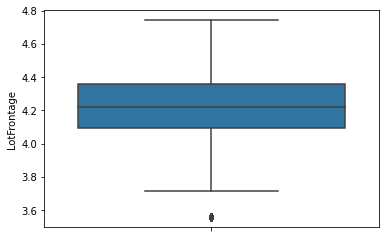

In [ ]:
sns.boxplot( y=df["LotFrontage"]);
plt.show()

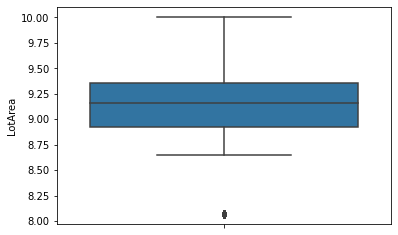

In [ ]:
df["LotArea"]= np.where((df["LotArea"]<8.65046), df['LotArea'].quantile(0.05),df['LotArea'])
df["LotArea"]= np.where((df["LotArea"]>10.010846), df['LotArea'].quantile(0.95),df['LotArea'])
sns.boxplot( y=df["LotArea"]);
plt.show()

In [ ]:
df["1stFlrSF"]= np.where((df["1stFlrSF"]<6.085527), df['1stFlrSF'].quantile(0.05),df['1stFlrSF'])
df["1stFlrSF"]= np.where((df["1stFlrSF"]>7.925098), df['1stFlrSF'].quantile(0.95),df['1stFlrSF'])
df.shape

(2919, 79)

In [ ]:
df["GrLivArea"]= np.where((df["GrLivArea"]<6.370592), df['GrLivArea'].quantile(0.05),df['GrLivArea'])
df["GrLivArea"]= np.where((df["GrLivArea"]>8.119484), df['GrLivArea'].quantile(0.95),df['GrLivArea'])
df.shape

(2919, 79)

In [ ]:
df["SalePrice"]= np.where((df["SalePrice"]<3937.500000), df['SalePrice'].quantile(0.05),df['SalePrice'])
df["SalePrice"]= np.where((df["SalePrice"]>340037.500000), df['SalePrice'].quantile(0.95),df['SalePrice'])
df.shape

(2919, 79)

In [ ]:
df['SalePrice'].tail()

1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, dtype: float64

## Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_features.remove('ind')

In [ ]:
for feature in categorical_features:
    print((df[feature].value_counts()))

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64
Norm      2511
Feedr      164
Artery 

In [ ]:
for feature in categorical_features:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')
    

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

#### Label Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [ ]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,0,4.382027,9.360655,1,0,1,1,0,0,5,1,1,3,4,5,6,49,49,0,0,6,6,0,0.0,1,2,2,2,2,1,1,468.0,3,144.0,270.0,882.0,1,2,1,2,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,1,5,3,0,0,2,49.0,1,1.0,730.0,2,2,2,140,0,0,0,120,0,1,0,6,2010,2,2,test,NaN
1,1462,20,2,4.394449,9.565704,1,1,1,1,2,0,5,2,1,3,4,6,6,52,52,2,0,1,0,2,108.0,1,2,2,2,2,1,4,923.0,4,0.0,406.0,1329.0,1,2,1,2,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,3,0,0,2,52.0,1,1.0,312.0,2,2,2,393,36,0,0,0,0,3,12500,6,2010,2,2,test,NaN
2,1463,60,2,4.304065,9.534595,1,1,1,1,0,0,10,2,1,3,5,5,5,13,12,0,0,6,6,0,0.0,1,2,3,3,2,1,6,791.0,4,0.0,137.0,928.0,1,3,1,2,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,1,6,3,1,2,2,13.0,3,2.0,482.0,2,2,2,212,34,0,0,0,0,1,0,3,2010,2,2,test,NaN
3,1464,60,2,4.356709,9.208138,1,1,1,1,0,0,10,2,1,3,5,6,6,12,12,0,0,6,6,2,20.0,1,2,3,2,2,1,6,602.0,4,0.0,324.0,926.0,1,4,1,2,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,3,1,3,2,12.0,3,2.0,470.0,2,2,2,360,36,0,0,0,0,3,0,6,2010,2,2,test,NaN
4,1465,120,2,3.761200,8.065265,1,1,3,1,0,0,7,2,1,4,4,8,5,18,18,0,0,3,4,0,0.0,2,2,3,3,2,1,4,263.0,4,0.0,1017.0,1280.0,1,4,1,2,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,3,0,0,2,18.0,2,2.0,506.0,2,2,2,0,82,0,0,144,0,3,0,1,2010,2,2,test,NaN


In [ ]:
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [ ]:
test.drop('SalePrice', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train.drop('ind', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
nan_feature = [feature for feature in test.columns if test[feature].isnull().sum()>=1]
nan_feature.remove('GarageCars')

In [ ]:
for feature in nan_feature:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    test[feature].fillna(median_value,inplace=True)
    
test[nan_feature].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
GarageArea     0
dtype: int64

In [ ]:
md = test['GarageCars'].mode()
print(md)

0    2.0
dtype: float64


In [ ]:
test['GarageCars'].fillna(2,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [ ]:
test.drop('ind', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
y_data=train['SalePrice']
x_data=train.drop('SalePrice',axis=1)

In [ ]:
x_data.shape, test.shape

((1460, 77), (1459, 77))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
x_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(x_train, y_train)
mutual_info

array([0.        , 0.27257603, 0.1151288 , 0.1493712 , 0.12744108,
       0.        , 0.06661487, 0.0140641 , 0.0029085 , 0.02958717,
       0.        , 0.42812611, 0.01888698, 0.00603076, 0.02917657,
       0.08464089, 0.5572515 , 0.12277431, 0.3174721 , 0.27108128,
       0.01881229, 0.00276438, 0.13705062, 0.14903332, 0.08307184,
       0.08326567, 0.3404041 , 0.03650566, 0.2133329 , 0.32418348,
       0.01728487, 0.04982289, 0.1668827 , 0.17055731, 0.03491143,
       0.00841489, 0.1421164 , 0.36056938, 0.00935347, 0.16893121,
       0.07847003, 0.07214075, 0.28492859, 0.21044566, 0.01446183,
       0.47867074, 0.02769543, 0.        , 0.25757406, 0.06741878,
       0.06321005, 0.00954381, 0.30994566, 0.20225859, 0.0386494 ,
       0.15671455, 0.16720225, 0.21404394, 0.27412776, 0.24717167,
       0.36020748, 0.36614999, 0.03979998, 0.06849771, 0.07651371,
       0.08869206, 0.16452451, 0.00794531, 0.        , 0.01582812,
       0.        , 0.04636785, 0.        , 0.        , 0.     

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.557252
GrLivArea        0.478671
Neighborhood     0.428126
GarageArea       0.366150
TotalBsmtSF      0.360569
GarageCars       0.360207
ExterQual        0.340404
BsmtQual         0.324183
YearBuilt        0.317472
KitchenQual      0.309946
1stFlrSF         0.284929
GarageYrBlt      0.274128
MSSubClass       0.272576
YearRemodAdd     0.271081
FullBath         0.257574
GarageFinish     0.247172
GarageType       0.214044
Foundation       0.213333
2ndFlrSF         0.210446
TotRmsAbvGrd     0.202259
BsmtFinSF1       0.170557
HeatingQC        0.168931
FireplaceQu      0.167202
BsmtFinType1     0.166883
OpenPorchSF      0.164525
Fireplaces       0.156715
LotFrontage      0.149371
Exterior2nd      0.149033
BsmtUnfSF        0.142116
Exterior1st      0.137051
LotArea          0.127441
OverallCond      0.122774
MSZoning         0.115129
WoodDeckSF       0.088692
SaleCondition    0.087468
HouseStyle       0.084641
MasVnrArea       0.083266
MasVnrType       0.083072
SaleType    

In [ ]:
## Selecting the top 80 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=80)
selected_top_columns.fit(x_train, y_train)

SelectPercentile(percentile=80,
                 score_func=<function mutual_info_regression at 0x7f22befbfb90>)

In [ ]:
X_train_top_80 = list(x_train.columns[selected_top_columns.get_support()])
len(X_train_top_80)

61

In [ ]:
X_train_feature = x_train[x_train.columns[x_train.columns.isin(X_train_top_80)]]
X_test_feature = x_test[x_test.columns[x_test.columns.isin(X_train_top_80)]]
df_test_feature = test[test.columns[test.columns.isin(X_train_top_80)]]

In [ ]:
# df_test_scaled = df_test_scaled.drop(df_test_scaled.index[-1])

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_feature , y_train)
predictions = model.predict(X_test_feature)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,predictions))
print('R2:',metrics.r2_score(y_test, predictions))

Mean Absolute Error(MAE): 16592.687265263292
Mean Squared Error(MSE): 481550948.3506937
Root Mean Squared Error (RMSE): 21944.26914596824
Explained Variance Score (EVS): 0.892584885134215
R2: 0.8925215399634582


In [ ]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train_feature , y_train)
ridge_predictions = model_ridge.predict(X_test_feature)

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, ridge_predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, ridge_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, ridge_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,ridge_predictions))
print('R2:',metrics.r2_score(y_test, ridge_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, ridge_predictions)).round(2))
r2 = r2_score(y_test, ridge_predictions)
r2_rounded = r2_score(y_test, ridge_predictions).round(2)

Mean Absolute Error(MAE): 16591.50567625613
Mean Squared Error(MSE): 481217242.9772199
Root Mean Squared Error (RMSE): 21936.664353935397
Explained Variance Score (EVS): 0.8926684992191843
R2: 0.8925960204307269
R2 rounded: 0.89


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_DecisionTree = DecisionTreeRegressor()
model_DecisionTree.fit(X_train_feature , y_train)
DecisionTree_predictions = model_DecisionTree.predict(X_test_feature)

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, DecisionTree_predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, DecisionTree_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, DecisionTree_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,DecisionTree_predictions))
print('R2:',metrics.r2_score(y_test, DecisionTree_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, DecisionTree_predictions)).round(2))
r2 = r2_score(y_test, DecisionTree_predictions)
r2_rounded = r2_score(y_test, DecisionTree_predictions).round(2)

Mean Absolute Error(MAE): 21694.08904109589
Mean Squared Error(MSE): 882949272.7328764
Root Mean Squared Error (RMSE): 29714.462349719142
Explained Variance Score (EVS): 0.8029879794012618
R2: 0.8029325278067903
R2 rounded: 0.8


In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train_feature , y_train)
RandomForest_predictions = rf_random.predict(X_test_feature)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, RandomForest_predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, RandomForest_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, RandomForest_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,RandomForest_predictions))
print('R2:',metrics.r2_score(y_test, RandomForest_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, RandomForest_predictions)).round(2))
r2 = r2_score(y_test, RandomForest_predictions)
r2_rounded = r2_score(y_test, RandomForest_predictions).round(2)

Mean Absolute Error(MAE): 13625.954784074911
Mean Squared Error(MSE): 380004955.9576255
Root Mean Squared Error (RMSE): 19493.715806834403
Explained Variance Score (EVS): 0.9151858276512572
R2: 0.9151858227826899
R2 rounded: 0.92


# **Prediction**

In [ ]:
predictions = rf_random.predict(df_test_feature)

In [ ]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predictions})

In [ ]:
submission.to_csv(path_or_buf = 'submission.csv', \
                   sep = ',', index = False)

In [ ]:
submission

,Id,SalePrice
0,1461,125044.760952
1,1462,150191.395086
2,1463,180698.838894
3,1464,181831.642950
4,1465,187557.651723
5,1466,183363.631406
6,1467,171207.599539
7,1468,175194.009642
8,1469,179289.431509
9,1470,129672.224925
